In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import dabl

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.drop(columns=['ID'], inplace=True)

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer']).dt.year

In [7]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013.028125,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,0.684554,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null int64
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 non-null int64
AcceptedCmp4           2240 n

## Missing Values

In [9]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Only Income shows missing values

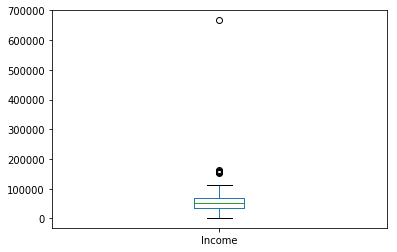

In [10]:
df.Income.plot(kind='box')

In [11]:
df.Income.mean(), df.Income.median()

(52247.25135379061, 51381.5)

In [12]:
df['Income'] = df['Income'].fillna(df['Income'].median())

# Exploratory analysis

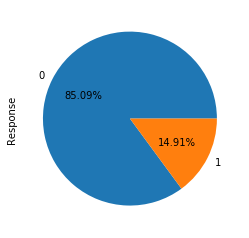

In [13]:
df.Response.value_counts().plot(kind='pie', autopct='%.2f%%')

Text(0.5, 0, 'MntWines')

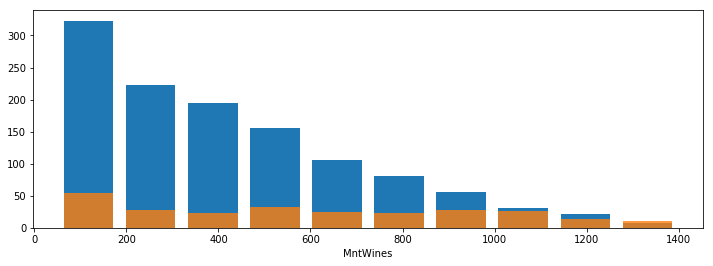

In [14]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].MntWines, rwidth=.8, range=(50,1400))
plt.hist(df[df.Response == 1].MntWines, rwidth=.8, alpha=.8, range=(50,1400))

plt.xlabel('MntWines')

The greater the consumption of wines, the closer the proportion of acceptance in the campaign. In the last range, adherence was greater than 50%.

Text(0.5, 0, 'MntMeatProducts')

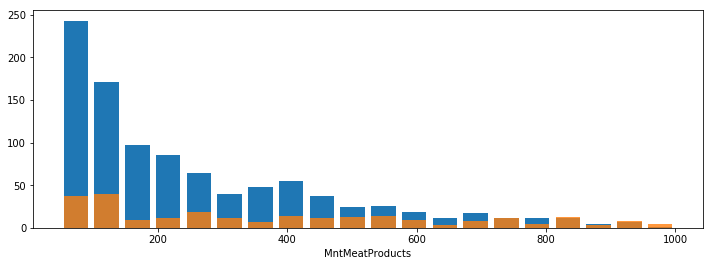

In [15]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].MntMeatProducts, bins= 20, rwidth=.8, range=(50,1000))
plt.hist(df[df.Response == 1].MntMeatProducts, bins= 20, rwidth=.8, alpha=.8, range=(50,1000))

plt.xlabel('MntMeatProducts')

The greater the consumption of meat, the closer the proportion of campaign's acceptance.

Text(0.5, 0, 'NumCatalogPurchases')

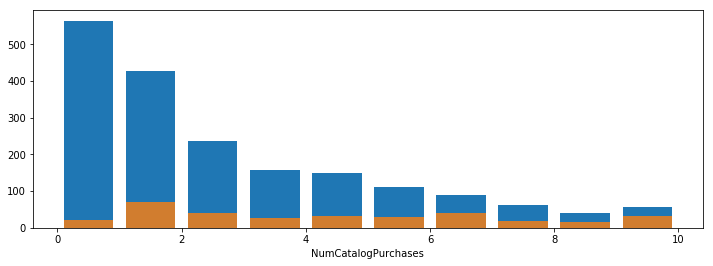

In [16]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].NumCatalogPurchases, bins= 10, rwidth=.8, range=(0,10))
plt.hist(df[df.Response == 1].NumCatalogPurchases, bins= 10, rwidth=.8, alpha=.8, range=(0,10))

plt.xlabel('NumCatalogPurchases')

The higher the consumption through the catalog, the closer the proportion of campaign's acceptance .

Text(0.5, 0, 'Recency')

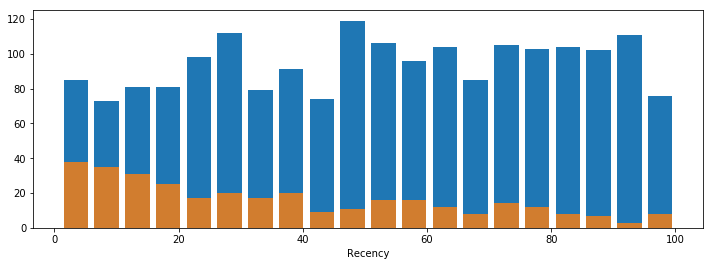

In [17]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].Recency, bins= 20, rwidth=.8, range=(1,100))
plt.hist(df[df.Response == 1].Recency, bins= 20, rwidth=.8, alpha=.8, range=(1,100))

plt.xlabel('Recency')

The lower the Recency, the closer the proportion of campaign's acceptance

Text(0.5, 0, 'NumWebPurchases')

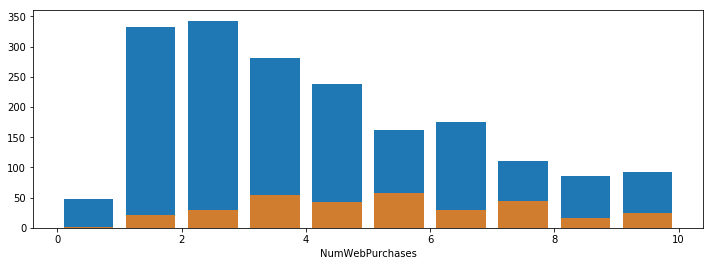

In [18]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].NumWebPurchases, rwidth=.8, range=(0,10))
plt.hist(df[df.Response == 1].NumWebPurchases, rwidth=.8, alpha=.8, range=(0,10))

plt.xlabel('NumWebPurchases')

The higher the consumption through the web, the closer the proportion of campaign's acceptance.

Text(0.5, 0, 'MntGoldProds')

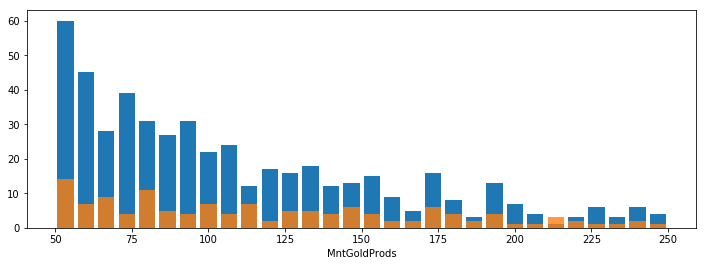

In [19]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].MntGoldProds, bins= 30, rwidth=.8, range=(50,250))
plt.hist(df[df.Response == 1].MntGoldProds, bins= 30, rwidth=.8, alpha=.8, range=(50,250))

plt.xlabel('MntGoldProds')

The greater the consumption of gold products, the closer the proportion of campaign's acceptance.

Text(0.5, 0, 'Income')

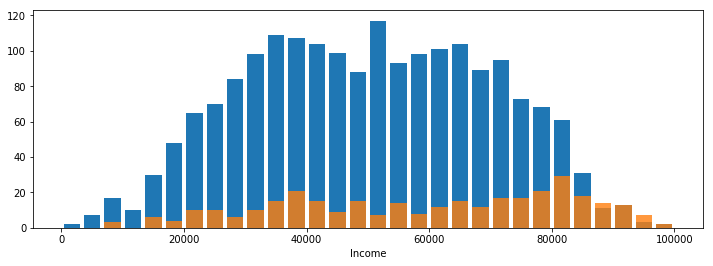

In [20]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].Income, bins= 30, rwidth=.8, range=(50,100000))
plt.hist(df[df.Response == 1].Income, bins= 30, rwidth=.8, alpha=.8, range=(50,100000))

plt.xlabel('Income')

The higher the Income, the closer the proportion of acceptance to the campaign. Smaller income tends not to adhere while larger Incomes adhere more.

Text(0.5, 0, 'MntSweetProducts')

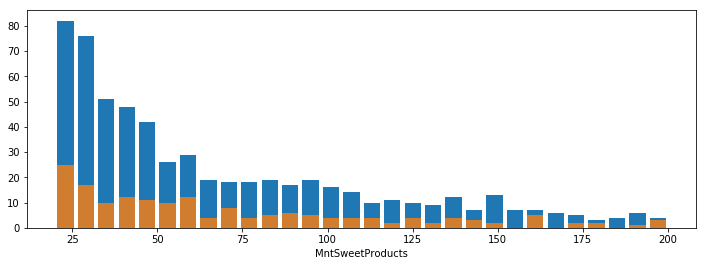

In [21]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].MntSweetProducts, bins= 30, rwidth=.8, range=(20,200))
plt.hist(df[df.Response == 1].MntSweetProducts, bins= 30, rwidth=.8, alpha=.8, range=(20,200))

plt.xlabel('MntSweetProducts')

The higher the consumption of sweets, the closer the proportion of campaign's acceptance

Text(0.5, 0, 'MntFruits')

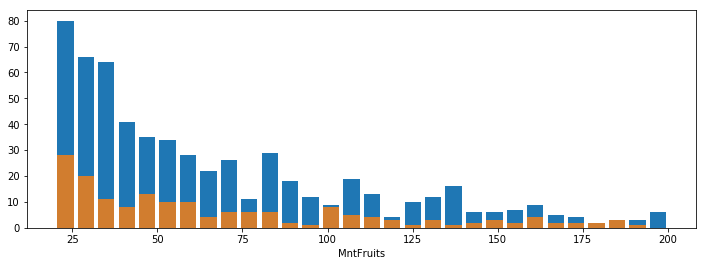

In [22]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].MntFruits, bins= 30, rwidth=.8, range=(20,200))
plt.hist(df[df.Response == 1].MntFruits, bins= 30, rwidth=.8, alpha=.8, range=(20,200))

plt.xlabel('MntFruits')

The higher the consumption of fruit, the closer the proportion of campaign's acceptance.

Text(0.5, 0, 'MntFishProducts')

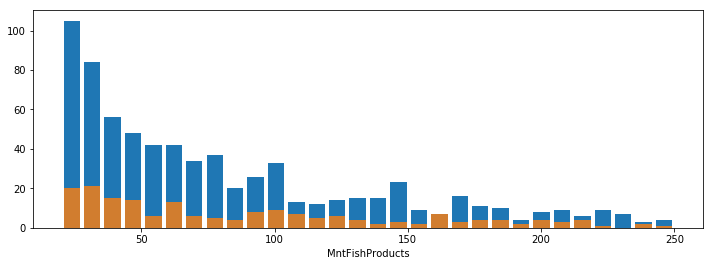

In [23]:
plt.figure(figsize=(12,4))
plt.hist(df[df.Response == 0].MntFishProducts, bins= 30, rwidth=.8, range=(20,250))
plt.hist(df[df.Response == 1].MntFishProducts, bins= 30, rwidth=.8, alpha=.8, range=(20,250))

plt.xlabel('MntFishProducts')

The greater the consumption of fish, the closer the proportion of campaign's acceptance.

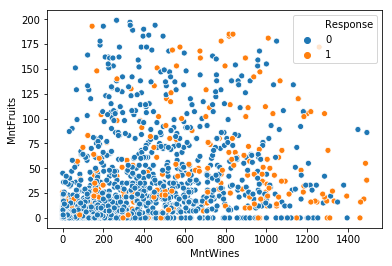

In [24]:
sns.scatterplot(x='MntWines', y='MntFruits', data=df, hue='Response')

In this graph, the further to the right and up, the greater the adherence to the campaign

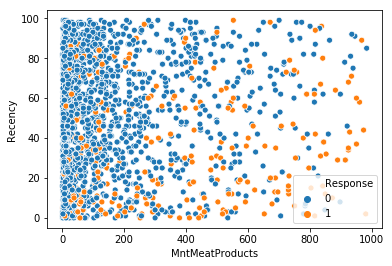

In [25]:
sns.scatterplot(x='MntMeatProducts', y='Recency', data=df[df.MntMeatProducts <1250], hue='Response')

In this graph, the further to the right and down, the greater the adherence to the campaign.

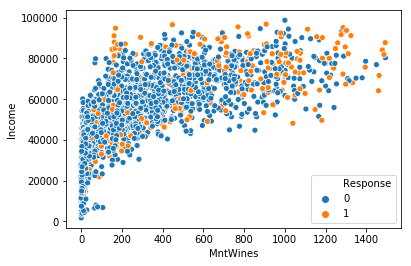

In [26]:
sns.scatterplot(x='MntWines', y='Income', data=df[df.Income < 100000], hue='Response')

In this graph, the further to the right and up, the greater the adherence to the campaign

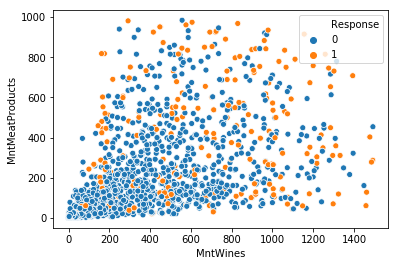

In [27]:
sns.scatterplot(x='MntWines', y='MntMeatProducts', data=df[df.MntMeatProducts <1250], hue='Response')

In this graph, the further to the right and up, the greater the adherence to the campaign.

Text(0.5, 0, 'Teenhome')

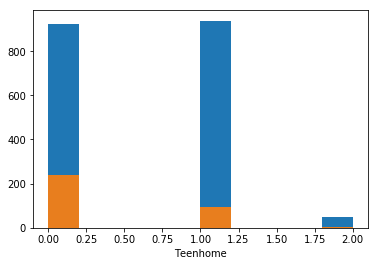

In [28]:
plt.hist(df[df.Response == 0].Teenhome)
plt.hist(df[df.Response == 1].Teenhome, alpha=.9)

plt.xlabel('Teenhome')

People without teenage children had more adherence to the product

Text(0.5, 0, 'Kidhome')

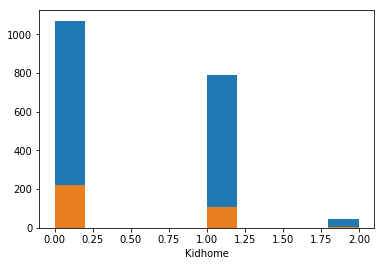

In [29]:
plt.hist(df[df.Response == 0].Kidhome)
plt.hist(df[df.Response == 1].Kidhome, alpha=.9)

plt.xlabel('Kidhome')

People without young children had more adherence to the product

In [30]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [31]:
df.loc[df['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Other'
df.loc[df['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Other'
df.loc[df['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Other'

In [32]:
df_pivot = pd.crosstab(df['Response'], df['Marital_Status'], normalize='columns')
df_pivot

Marital_Status,Divorced,Married,Other,Single,Together,Widow
Response,,,,,,
0,0.793103,0.886574,0.571429,0.779167,0.896552,0.753247
1,0.206897,0.113426,0.428571,0.220833,0.103448,0.246753


We can see that the proportion is higher in Other, followed by Widow, Single and Divorced. We don't know very well what others are but we can conclude that people who live without a partner have joined more.

In [33]:
df_pivot2 = pd.crosstab(df['Response'], df['Education'], normalize='columns')
df_pivot2

Education,2n Cycle,Basic,Graduation,Master,PhD
Response,,,,,
0,0.891626,0.962963,0.865129,0.845946,0.792181
1,0.108374,0.037037,0.134871,0.154054,0.207819


When we look at the educational level we see a higher proportion of acceptance with higher levels of studies: PhD (20.7%) and Master (15.4%)

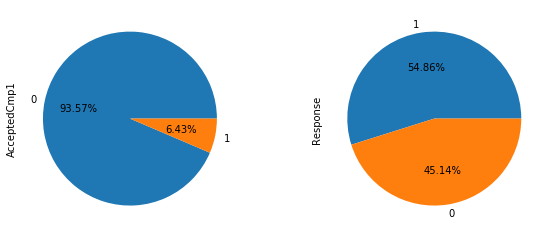

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['AcceptedCmp1'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[0])
df[df['AcceptedCmp1'] == 1].Response.value_counts().plot(kind='pie', autopct='%.2f%%')

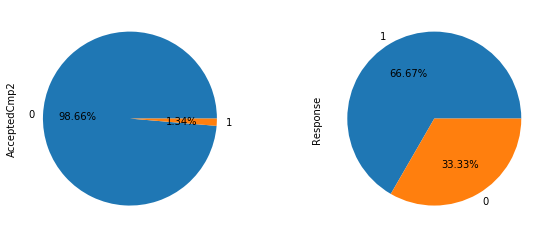

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['AcceptedCmp2'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[0])
df[df['AcceptedCmp2'] == 1].Response.value_counts().plot(kind='pie', autopct='%.2f%%')

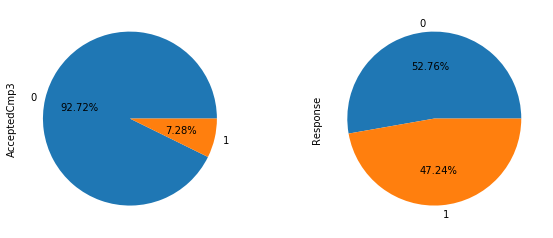

In [36]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['AcceptedCmp3'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[0])
df[df['AcceptedCmp3'] == 1].Response.value_counts().plot(kind='pie', autopct='%.2f%%')

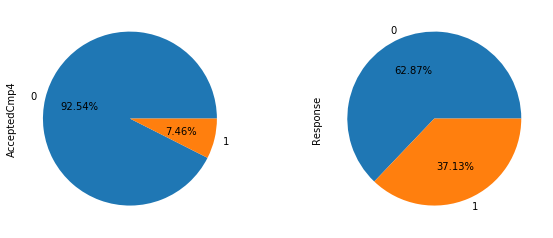

In [37]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['AcceptedCmp4'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[0])
df[df['AcceptedCmp4'] == 1].Response.value_counts().plot(kind='pie', autopct='%.2f%%')

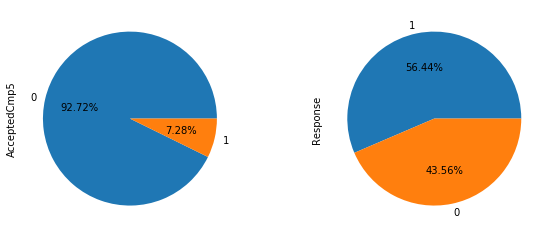

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
df['AcceptedCmp5'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[0])
df[df['AcceptedCmp5'] == 1].Response.value_counts().plot(kind='pie', autopct='%.2f%%', ax=ax[1])

Campaign 2 had very low adherence (1.34%). We can disregard.
The others had between 6% and 8%. Among those who joined these campaigns, campaigns 1, 3 and 5 had more than 50% adherence in the new campaign.

* Higher levels of consumption of Wine, Meat, Gold products, Fruits, Sweet, Fish, have greater adherence.

* The higher the Income, the greater the adherence.

* Higher levels of purchases by Catalog, Web has greater adherence.

* The lower the Recency, the greater the adherence.

* People without children, with higher educational levels and without a partner have greater adherence.

* Among those who joined previous campaigns, campaigns 1, 3 and 5 had better results.

# Segmentation

In [39]:
X = df.drop(columns=['Response'])
y = df.Response

In [40]:
X.shape, y.shape

((2240, 27), (2240,))

In [41]:
X.nunique()

Year_Birth               59
Education                 5
Marital_Status            6
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer               3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
dtype: int64

In [42]:
X = pd.get_dummies(X, columns=['Education', 'Marital_Status'], drop_first=True)

### Feature Selection

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), step=10)
rfe_selector.fit(X, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()

print(str(len(rfe_feature)), 'selected variables:')
print(str(rfe_feature))

17 selected variables:
['Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together']


In [44]:
X = X[['Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together']]

### Silhouette score

In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering

centroide = [2,3,4,5,6,7,8,9,10]

for numero_centroide in centroide:
    clusters = KMeans(n_clusters=numero_centroide)
    predicao = clusters.fit_predict(X)
    centers = clusters.cluster_centers_
    
    score = silhouette_score(X, predicao)
    print(numero_centroide, score)

2 0.5741319491462457
3 0.5044867237160996
4 0.44488115256563027
5 0.39930949047351844
6 0.3530797355698757
7 0.31811297024816765
8 0.2830263148304667
9 0.26205987546455684
10 0.25560942566861145


We will use three clusters

### k-means

In [46]:
kmeans = KMeans(n_clusters=3, n_init=10)

df['kmeans'] = kmeans.fit_predict(X)

In [47]:
df['kmeans'].value_counts().tolist()

[763, 747, 730]

**Cluster 0**

In [48]:
df[df['kmeans'] == 0].Response.value_counts()

0    651
1     96
Name: Response, dtype: int64

In [49]:
181 / 599 * 100

30.217028380634392

**Cluster 1**

In [50]:
df[df['kmeans'] == 1].Response.value_counts()

0    671
1     59
Name: Response, dtype: int64

In [51]:
59 / 671 * 100

8.79284649776453

**Cluster 2**

In [52]:
df[df['kmeans'] == 2].Response.value_counts()

0    584
1    179
Name: Response, dtype: int64

In [53]:
94 / 636 * 100

14.779874213836477

**In cluster 0 30.21% joined the campaign. In cluster 1 8.79% and in cluster 2 14.77%.**

### Agglomerative Clustering

In [54]:
agl = AgglomerativeClustering(linkage='complete', n_clusters=3)

df['agl'] = agl.fit_predict(X)

In [55]:
df['agl'].value_counts()

0    1076
1     784
2     380
Name: agl, dtype: int64

**Cluster 0**

In [56]:
df[df['agl'] == 0].Response.value_counts()

0    975
1    101
Name: Response, dtype: int64

In [57]:
101 / 975 * 100

10.358974358974358

**Cluster 1**

In [58]:
df[df['agl'] == 1].Response.value_counts()

0    662
1    122
Name: Response, dtype: int64

In [59]:
122 / 662 * 100

18.429003021148034

**Cluster 2**

In [60]:
df[df['agl'] == 2].Response.value_counts()

0    269
1    111
Name: Response, dtype: int64

In [61]:
111 / 269 * 100

41.2639405204461

**In cluster 0 10.35% joined the campaign. In cluster 1 18.42% and in cluster 2 41.26%.**

# Prediction

6720MU / 2240 customers = 3MU per customer (cost per customer)

3,674MU / (14.91% * 2240) = 3,674 / 334 = 11MU (revenue per sale)

**If the model is applied to 100,000 customers:**

* kmeans cluster 0: 34.82%, 30.21%

Using the k-means model the cost would be 100,000 * 3MU * 0.3482. Results in 104,460MU.

Out of 100,000, 34,820 would be approached. Of these, 10,519 would accept.

10,519 * 11MU = 115,719MU

115,719 - 104,460 = 11,259MU. The difference between revenue and cost would be 11,259MU

* Agg: 16.96%, 41.26%

Using the aggregation model the cost would be 100,000 * 3MU * 0.1696. Results in 50,880MU.

Out of 100,000, 16,960 would be approached. Of these, 6,998 would accept.

6.998 * 11MU = 76.978MU

76,978MU - 50,880MU = 26,098MU. The difference between revenue and cost would be 26,098MU